In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style #Grid
import matplotlib.ticker as ticker #Convert to Millions

#Converter
def millions_converter(x, pos):
    return f'{x / 1000000:.0f}M'

In [29]:
df=pd.read_csv('diwali_sales_data.csv') 
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra?radesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Cleaning

In [30]:
#Shape of Data
df.shape

(11251, 15)

In [31]:
# Check Summary of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [32]:
type(df)

pandas.core.frame.DataFrame

In [33]:
# Remove Unwanted Column
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [34]:
#Check if Column is removed or not?
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra?radesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [35]:
#Check Null Value for each Column
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [36]:
#Drop Null Values
df.dropna(inplace= True)

In [37]:
# Check Null Value for each Columnn Again
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
#Change Datatype of Amount  [ float - int ]
df['Amount']= df['Amount'].astype('int')             # df['Salary'].astype('int')

In [40]:
#Check Datatype of column 
df['Amount'].dtype                                   # type(x)      df['Salary'].dtype

dtype('int32')

In [41]:
#list all the columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [42]:
#Rename Column
df.rename(columns={"Age Group":"Age_Group"}, inplace=True)

In [43]:
type(df)

pandas.core.frame.DataFrame

In [44]:
#Basic Stats
#df.describe()
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [48]:
'''
#MILLION CONVERTER FUNCTION

def millions_converter(x, pos):
    return f'{x / 1000000:.0f}M'
  
#EMBEDD IN EACH CHARTS

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)
'''

"\n#MILLION CONVERTER FUNCTION\n\ndef millions_converter(x, pos):\n    return f'{x / 1000000:.0f}M'\n  \n#EMBEDD IN EACH CHARTS\n\nconverter = ticker.FuncFormatter(millions_converter)\nplt.gca().yaxis.set_major_formatter(converter)\n"

## Gender

### Total Customer by Gender

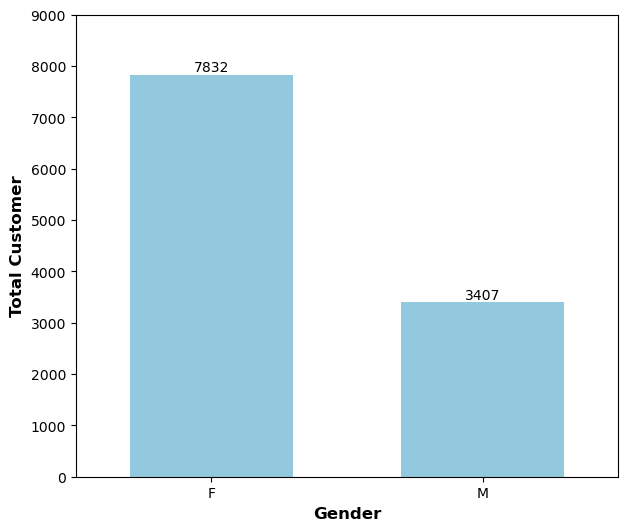

In [49]:
plt.figure(figsize=(7,6))
ax=sns.countplot(x='Gender',width=0.6,color='skyblue',data=df)

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel('Gender',fontsize=12, fontweight= 'bold')
plt.ylabel('Total Customer', fontsize=12, fontweight= 'bold')
plt.ylim(0,9000)
plt.show()

### Gender that spend most Money

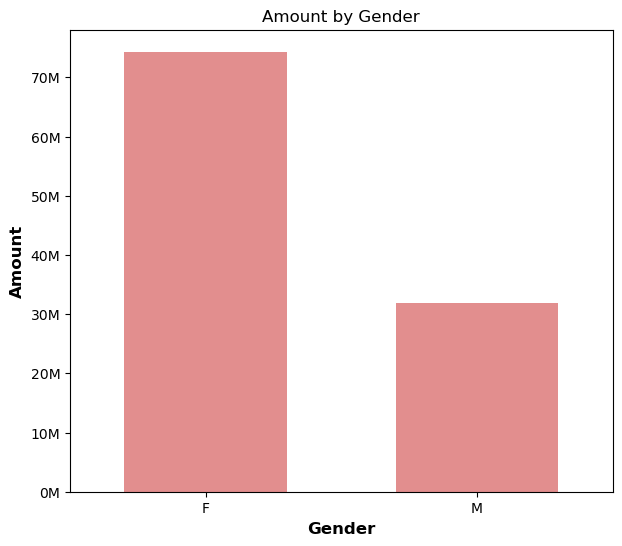

In [50]:
plt.figure(figsize=(7,6))
x= sns.barplot(x='Gender',y='Amount',width=0.6,color='lightcoral',estimator='sum',errorbar=None, data=df)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.title("Amount by Gender")
plt.xlabel('Gender',fontsize=12, fontweight= 'bold')
plt.ylabel('Amount',fontsize=12, fontweight= 'bold')
plt.show()

### Gender that orders most

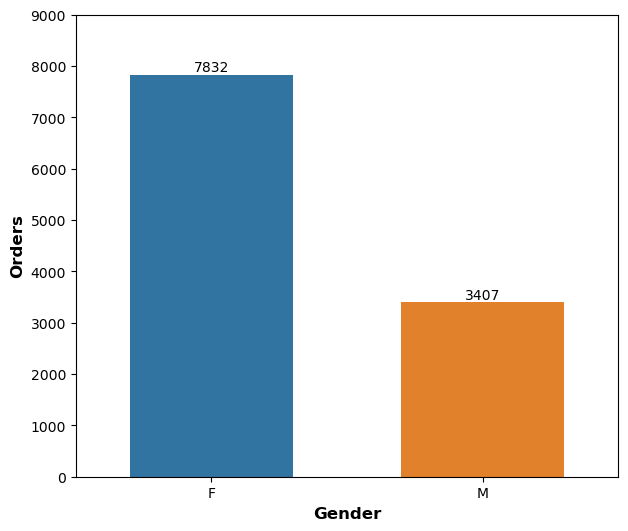

In [51]:
plt.figure(figsize=(7,6))
ax=sns.barplot(x='Gender',y='Orders',width=0.6,errorbar=None,estimator='count', data=df)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Gender", fontsize=12, fontweight= 'bold')
plt.ylabel("Orders", fontsize=12, fontweight= 'bold')
plt.ylim(0,9000)
plt.show()

## Age_Group

### Age_group that spend most

In [56]:
#Amount Spend By Age Group
amt_spend_by_age_group= df.groupby(['Age_Group', 'Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount')
amt_spend_by_age_group=amt_spend_by_age_group.reset_index(drop=True)
amt_spend_by_age_group.head()

,Age_Group,Gender,Amount
0,0-17,M,1258244
1,0-17,F,1441409
2,55+,M,1676056
3,55+,F,2404931
4,46-50,M,2464451


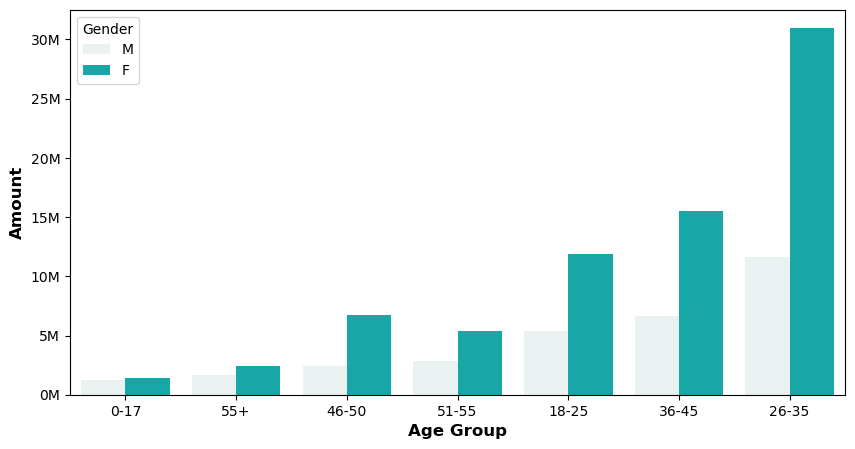

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x='Age_Group', y='Amount',hue='Gender',color='c', data=amt_spend_by_age_group)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.xlabel("Age Group", fontsize=12, fontweight= 'bold')
plt.ylabel("Amount",fontsize=12, fontweight= 'bold')
plt.show()

### Women sale share of age 26-35

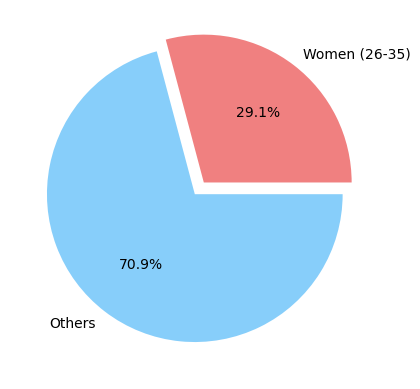

In [115]:
# Pre-process (Total Amount, Spend by Women 26-35)
total_amount =amt_spend_by_age_group['Amount'].sum() 
spend_by_26_35_women = amt_spend_by_age_group[(amt_spend_by_age_group['Age_Group']=='26-35') & (amt_spend_by_age_group['Gender']=='F')]  ['Amount'].sum()

# Calculate percentage
women_26_35_share = (spend_by_26_35_women / total_amount) * 100
other_percentage = 100 - women_26_35_share


# Create the pie chart
sizes = [women_26_35_share, other_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice (Women) for emphasis

plt.pie(sizes, explode=explode, labels=['Women (26-35)','Others'], colors=colors, autopct='%1.1f%%')
plt.show()


### Women sale share of age 35-45

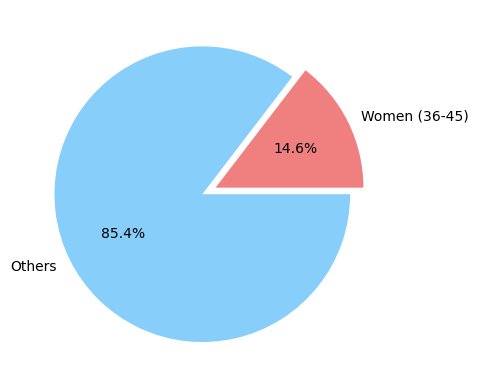

In [114]:
# Pre-process (Total Amount, Spend by Women 26-35)
total_amount =amt_spend_by_age_group['Amount'].sum() 
spend_by_36_45_women = amt_spend_by_age_group[(amt_spend_by_age_group['Age_Group']=='36-45') & (amt_spend_by_age_group['Gender']=='F')]  ['Amount'].sum()

# Calculate percentage
spend_by_36_45_women = (spend_by_36_45_women / total_amount) * 100
other_percentage = 100 - spend_by_36_45_women


# Create the pie chart
sizes = [spend_by_36_45_women, other_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice (Women) for emphasis

plt.pie(sizes, explode=explode, labels=['Women (36-45)','Others'], colors=colors, autopct='%1.1f%%')
plt.show()


## Above Both Combined

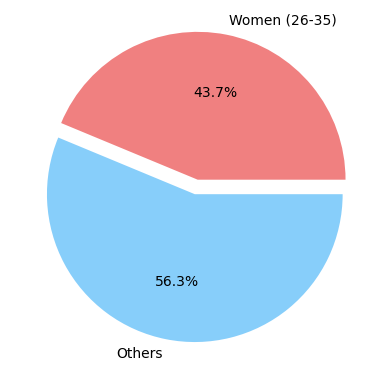

In [113]:
# Add Women of age group 26-35  +   36-45

combined= women_26_35_share+spend_by_36_45_women
other= 100-combined

# Create the pie chart
sizes = [combined, other]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice (Women) for emphasis

plt.pie(sizes, explode=explode, labels=['Women (26-35)','Others'], colors=colors, autopct='%1.1f%%')
plt.show()

In [103]:
women_26_35_share

14.59772531405881

### Age_group with most Orders

In [60]:
#Order Count Spend By Age Group
order_by_age_group= df.groupby(['Age_Group', 'Gender'], as_index= False)['Orders'].sum().sort_values(by='Orders')
order_by_age_group.head()

,Age_Group,Gender,Orders
1,0-17,M,313
0,0-17,F,377
13,55+,M,379
9,46-50,M,694
11,51-55,M,695


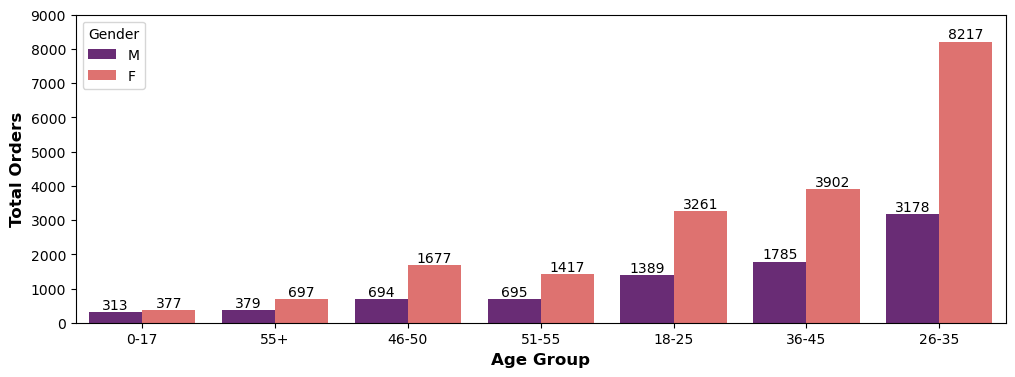

In [61]:
plt.figure(figsize=(12,4))

ax=sns.barplot(x='Age_Group', y='Orders',hue='Gender', palette='magma',data=order_by_age_group)

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel("Age Group", fontsize=12, fontweight='bold')
plt.ylabel("Total Orders", fontsize=12, fontweight='bold')
plt.ylim(0,9000)
plt.show()

## State

### Orders by State -- ascending=false(Imp) bcoz we need top 10 state, not random state

In [67]:
#Aggregating Data
order_by_state= df.groupby(['State', 'Gender'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending=False)
order_by_state=order_by_state.reset_index(drop=True)
order_by_state.head()

,State,Gender,Orders
0,Uttar Pradesh,F,3396
1,Maharashtra,F,2813
2,Karnataka,F,2265
3,Delhi,F,1868
4,Madhya Pradesh,F,1527


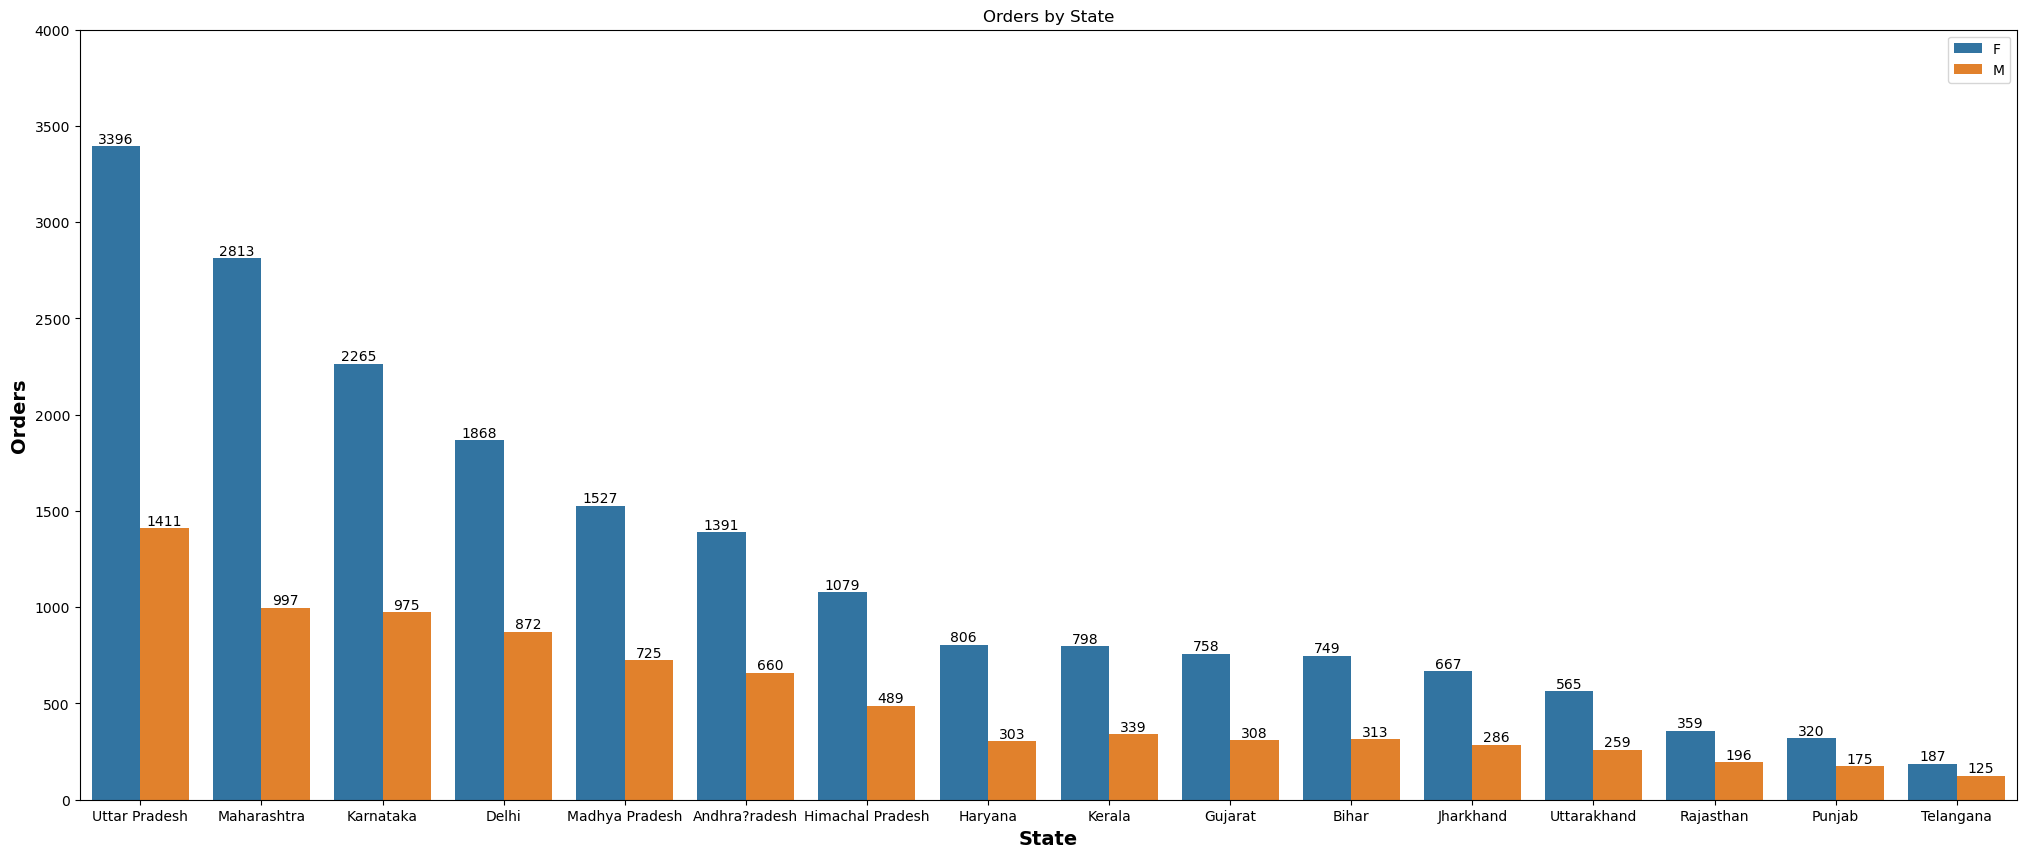

In [69]:
#Plot
plt.figure(figsize=(25,10))
x=sns.barplot(x='State', y='Orders', hue='Gender', data=order_by_state) 

for i in x.containers:
    x.bar_label(i)
    
plt.title("Orders by State")  
plt.xlabel('State',fontsize=14, fontweight='bold')
plt.ylabel('Orders',fontsize=14, fontweight='bold')
plt.ylim(0,4000)
plt.legend(loc=1)
plt.show()

### Amount By State  --       ascending= False 

In [73]:
#Aggregating Data
sales_by_state= df.groupby(['State', 'Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_by_state=sales_by_state.reset_index(drop=True)
sales_by_state.head()

,State,Gender,Amount
0,Uttar Pradesh,F,13662105
1,Maharashtra,F,10560976
2,Karnataka,F,9933966
3,Delhi,F,8264498
4,Uttar Pradesh,M,5712863


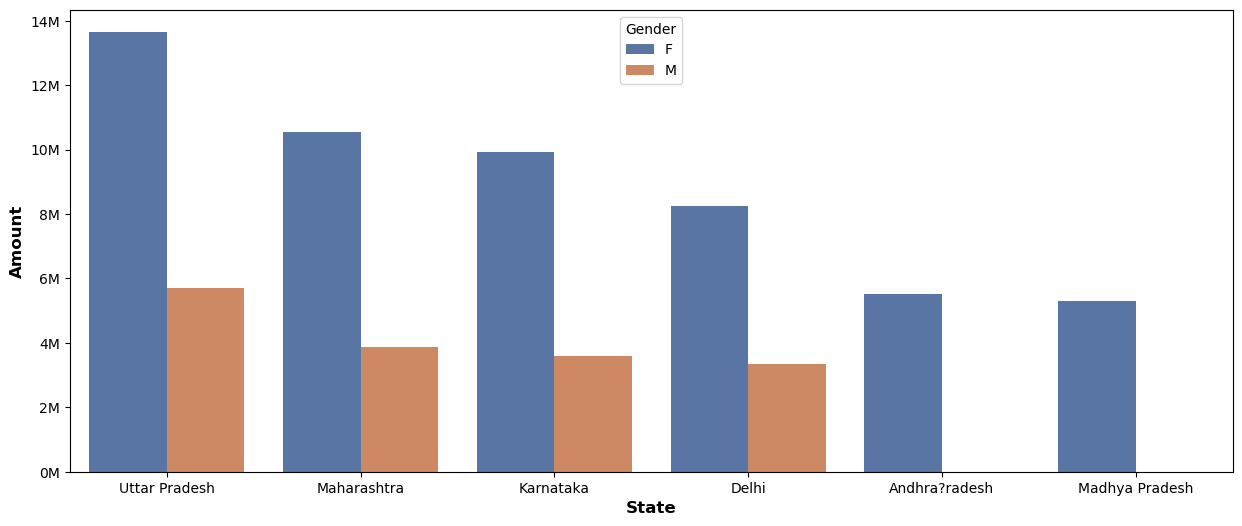

In [74]:
#Plot
plt.figure(figsize=(15,6))
x=sns.barplot(x='State', y='Amount', hue='Gender',palette='deep', data= sales_by_state)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.xlabel('State',fontsize=12, fontweight='bold')
plt.ylabel('Amount',fontsize=12, fontweight='bold')
plt.show()

# Marital Status

In [76]:
orders_by_marital_status= df.groupby(['Marital_Status'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending=False)
orders_by_marital_status.head(3)

,Marital_Status,Orders
0,0,16249
1,1,11732


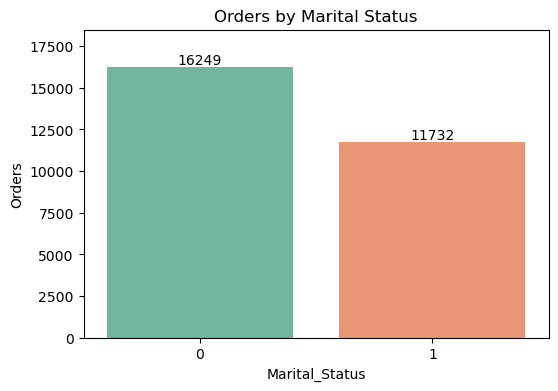

In [77]:
plt.figure(figsize=(6,4))
x=sns.barplot(x='Marital_Status', y='Orders',palette='Set2', data= orders_by_marital_status)

for i in x.containers:
    x.bar_label(i)
plt.title("Orders by Marital Status")
plt.ylim(0,18500)
plt.show()

In [78]:
amount_by_marital_status= df.groupby(['Marital_Status'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)
amount_by_marital_status.head(3)

,Marital_Status,Amount
0,0,62125384
1,1,44123745


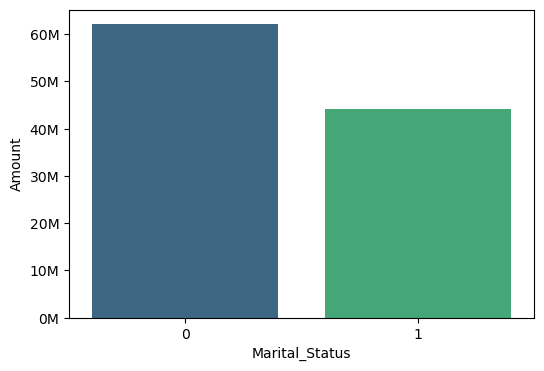

In [79]:
plt.figure(figsize=(6,4))
x=sns.barplot(x='Marital_Status', y='Amount',palette='viridis', data= amount_by_marital_status)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.show()

# Occupation

In [81]:
orders_by_occupation=df.groupby(['Occupation','Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
orders_by_occupation=orders_by_occupation.reset_index(drop=True)

### Orders by Customer Occupation

In [82]:
Amount_by_occupation= df.groupby(['Occupation', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
Amount_by_occupation= Amount_by_occupation.reset_index(drop=True)
Amount_by_occupation.head(5)

,Occupation,Gender,Amount
0,IT Sector,F,10184835
1,Aviation,F,9007393
2,Healthcare,F,8968231
3,Banking,F,7792295
4,Govt,F,6002907


### Amount by Customer Occupation

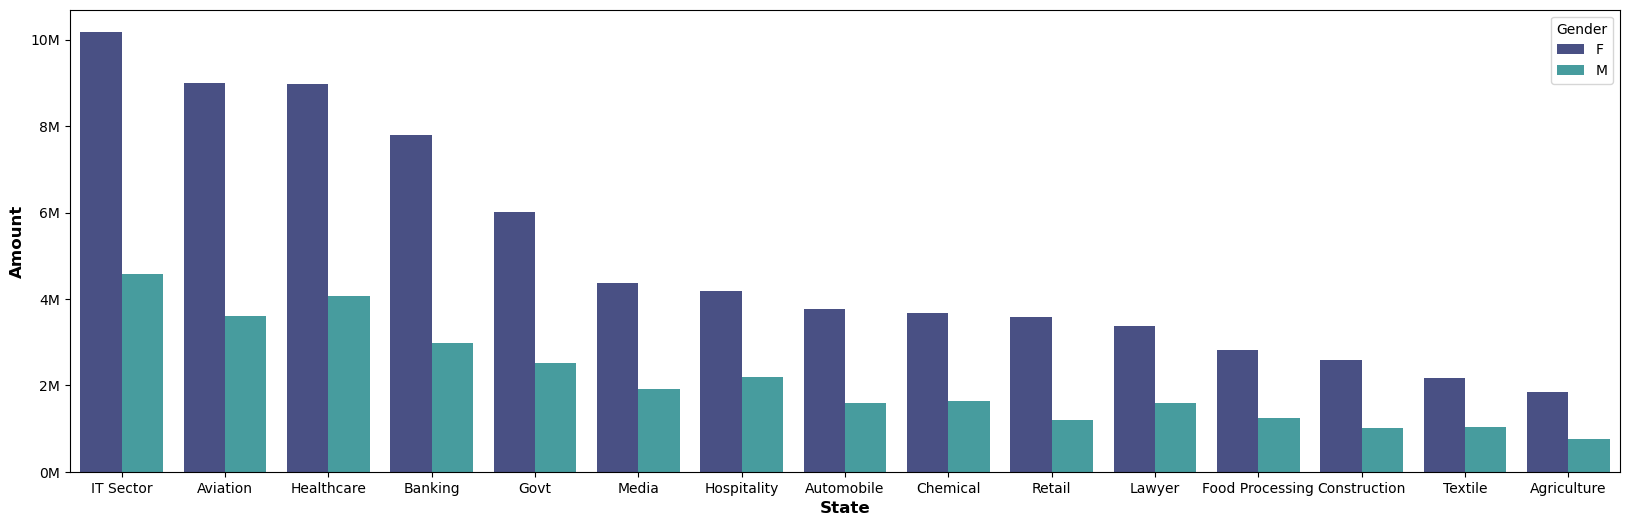

In [83]:
plt.figure(figsize=(20,6))
sns.barplot(x='Occupation', y='Amount',hue='Gender',errorbar=None, palette='mako',data= Amount_by_occupation)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.xlabel('State',fontsize=12, fontweight='bold')
plt.ylabel('Amount',fontsize=12, fontweight='bold')
plt.show()

# Product_Category

### Orders by Category

In [86]:
orders_by_cat= df.groupby(['Product_Category','State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
orders_by_cat=orders_by_cat.reset_index(drop=True)
orders_by_cat.head(5)

,Product_Category,State,Orders
0,Food,Uttar Pradesh,1406
1,Food,Maharashtra,1191
2,Clothing & Apparel,Uttar Pradesh,1186
3,Footwear & Shoes,Karnataka,841
4,Clothing & Apparel,Maharashtra,827


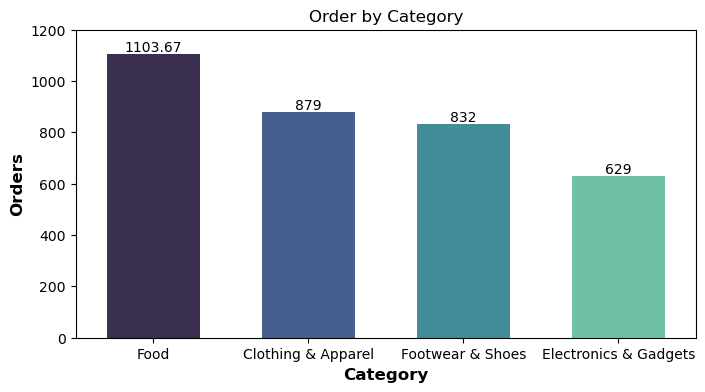

In [87]:
plt.figure(figsize=(8,4))
x=sns.barplot(x='Product_Category', y='Orders',width=0.6,errorbar=None, palette='mako', data= orders_by_cat)
for i in x.containers:
    x.bar_label(i)
plt.title("Order by Category")
plt.xlabel('Category',fontsize=12, fontweight='bold')
plt.ylabel('Orders',fontsize=12, fontweight='bold')
plt.ylim(0,1200)
plt.show()

### Amount by Category

In [63]:
amt_by_cat= df.groupby(['Product_Category','State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
amt_by_cat=amt_by_cat.reset_index(drop=True)
amt_by_cat.head(5)

,Product_Category,State,Amount
0,Food,Uttar Pradesh,7983142
1,Food,Maharashtra,6421531
2,Footwear & Shoes,Delhi,5027449
3,Footwear & Shoes,Karnataka,4963928
4,Food,Karnataka,3995458


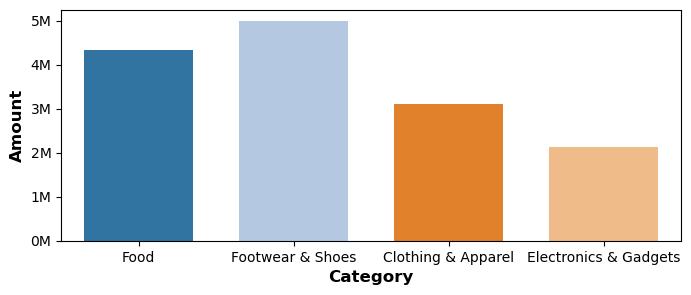

In [250]:
plt.figure(figsize=(8,3))

x=sns.barplot(x='Product_Category', y='Amount',width=0.7,errorbar=None, palette='tab20', data= amt_by_cat)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.xlabel('Category',fontsize=12, fontweight='bold')
plt.ylabel('Amount',fontsize=12, fontweight='bold')
plt.show()

# Insights

1-Women Spend 2.5 times more shopping than man in Diwali

2- Women with age group of 26-35 contribute to total of 29% Sale.

3-Women with age_Group of 35-45 contribute to total of 14% sale.

4- Top 3 State by Most Spend on Diwali------'UP','Maharastra', 'Karnatka'

5- Top 3 Occupation who spend on diwali------IT, Healthcare, Aviation 

6- Top 3 Category that gets most Orders----- Food, Clothing, Footwear

7- Top 3 Category that generate Most Revenue------Footwear, Food, Clothing 

## Recommendation

Skyline Plaza should do **marketing, promotional offers and discount** to  **Women** of **UP, Maharastra and Karnataka** of 
**age group 26-45 which contribute 43.7% of total sale** in Diwali. They can Focus on promoting the items realated to
**Food, Cloting and Footwear** as these 3 Categories are the hot selling categories in the diwali Season. 

They can run **Ads campaign** targeting to the people whose occupation are **IT, Aviation and Healthcare**
as most of the Customer who spend money are from these Occupations Only.
